In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [73]:
#conda install keras
from keras.datasets import cifar10

In [74]:
(x_train, y_train), (x_test, y_test) = np.load('cifar10.csv.npy')

In [75]:
#np.save('cifar10.csv', cifar)

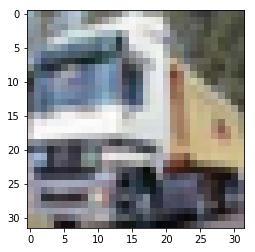

In [76]:
plt.imshow(x_train[1])

In [77]:
np.random.seed(6)

In [78]:
x_train.shape

(50000, 32, 32, 3)

In [79]:
x_train[1].shape

(32, 32, 3)

In [80]:
x_train.astype('float32')
x_test.astype('float32')
x_train = x_train/255.0
x_test = x_test/255.0

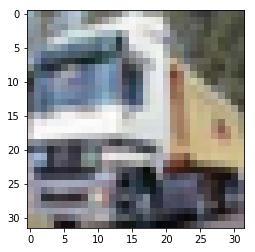

In [81]:
plt.imshow(x_train[1])

In [82]:
#one hot encode
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(y_train.shape)
print(y_train[1])
print(y_train[1].shape)

(50000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
(10,)


# build CNN network to object reconagation
input: 32*32 image
output: array category image
! structure CNN:
    Conv2D 96,3*3 ,relu
        Conv2D, 96, 3*3 ,relu
        maxpool, 2
        conv2D, 96, 3*3, relu
        Conv2D, 96,3*3, relu
        maxpool, 2
        conV2D, 1*1, 128
        conv2d, 1*1,10
        average_maxpool, 10, softmax

In [83]:
from keras.layers import Conv2D, Dropout, Activation, GlobalAveragePooling2D
from keras.models import Sequential
from keras.activations import relu, softmax
from keras.optimizers import SGD



In [84]:
def all_cnn(weight=None):
    model = Sequential()
    model.add(Conv2D(96,(3,3), padding='same', input_shape=(32,32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3,3),padding='same', strides=(2,2)))
    model.add(Dropout(0.5))
    
    
    model.add(Conv2D(192,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3), padding='same', strides=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(1,1), padding='valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10,(1,1), padding='valid'))
    
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    if weight:
        model.load_weights(weight)
    return model
    

In [85]:
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

weights = 'all_cnn_weights_0.9088_0.4994.hdf5'
model = all_cnn(weights)
sgd = SGD(lr=learning_rate, decay= weight_decay, momentum=momentum, nesterov=True)
# DEPLOY MODELS

model.compile(optimizer = sgd, metrics=['accuracy'], loss='categorical_crossentropy')

print(model.summary())
#weights = 'all_cnn_weights_0.9088_0.4994.hdf5'
#epochs = 10
#batch_size=64
score = model.evaluate(x_test, y_test, verbose=1)
print(score)
#model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_43 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_44 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 16, 16, 192)       166080    
__________

In [86]:
score[1]

0.9088

In [87]:
class_label = ['airplane', 'automobile', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse','ship', 'truck']

In [88]:
cal = np.arange(10)

In [89]:
class_label = dict(zip(cal, class_label))

In [90]:
class_label

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [91]:
pre = list(np.argmax(model.predict(x_test[100:129], verbose=1), axis=1))
test = list(np.argmax((y_test[100:129]), axis=1))

29/29 [==============================] - 0s 14ms/step


predict: deer           real data: deer      , result: True
predict: dog            real data: dog       , result: True
predict: frog           real data: frog      , result: True
predict: cat            real data: cat       , result: True
predict: automobile     real data: automobile, result: True
predict: automobile     real data: automobile, result: True
predict: cat            real data: cat       , result: True
predict: frog           real data: frog      , result: True
predict: ship           real data: ship      , result: True
predict: horse          real data: horse     , result: True
predict: deer           real data: deer      , result: True
predict: airplane       real data: airplane  , result: True
predict: bird           real data: frog      , result: False
predict: bird           real data: bird      , result: True
predict: automobile     real data: automobile, result: True
predict: cat            real data: cat       , result: True
predict: airplane       real data: airp

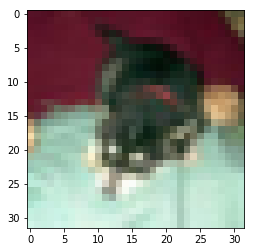

In [107]:

for i in range(len(pre)):
    plt.imshow(x_test[100+i])
    print('predict: {:10}     real data: {:10}, result: {}'.format(class_label[pre[i]],class_label[test[i]], pre[i]== test[i]))

In [94]:
%matplotlib inline